# Mathematical Underpinnings - Lab 2

## Task 1

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

We first compute the expectation over $Y|X=x$:

\begin{equation}
\begin{split}
\mathbb{E} \mathcal{L}(f(X), Y) 
 & = \mathbb{E}(aX - Y)^2 \\
 & = \mathbb{E}(a^2X^2 - 2aX^2 + \sigma^2 + X^2) \\
 & = \mathbb{E}((a - 1)^2X^2 +\sigma^2) \\
 & = (a - 1)^2(1 + 0) + \sigma^2 \\
 & = (a - 1)^2 + \sigma^2
\end{split}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps

### b)

In [2]:
# sampling

var_ = 1
n = 50
x = np.random.normal(0, 1, n)
eps = np.random.normal(0, var_, n)
y = x + eps

In [3]:
population_risk(1, var_)

1

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.power(x*a - y, 2).mean()

In [5]:
empirical_risk(1, x, y)

0.7812135903396201

### c)

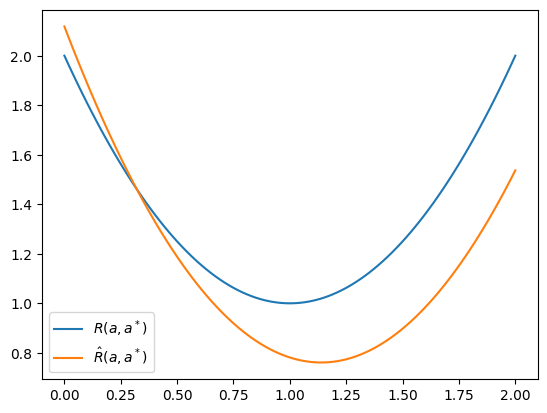

In [6]:
omega = np.linspace(0, 2, 100)
plt.plot(omega, [population_risk(a, var_) for a in omega], label='$R(a,a^*)$')
plt.plot(omega, [empirical_risk(a, x, y) for a in omega], label='$\hat{R}(a,a^*)$')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [7]:
from scipy.optimize import minimize
a_hat = minimize(lambda a: empirical_risk(a, x, y), x0=0).x[0]
a_hat

1.1388779808520098

In [8]:
# excess risk
def excess_risk(a_hat, a_star):
    return population_risk(a_hat, a_star) - np.min([population_risk(a,a_star) for a in np.linspace(0,2,100)])
excess_risk(a_hat, 1)

0.019185063160470417

In [9]:
# simulations with fixed sample size
L = 200
sample_size = 50
E = 0
for _ in range(L):
    x = np.random.normal(0, 1, sample_size)
    eps = np.random.normal(0, var_, sample_size)
    y = x + eps
    a_hat = minimize(lambda a: empirical_risk(a, x, y), x0=0).x[0]
    E += excess_risk(a_hat, 1) / L
E

0.019505580331290035

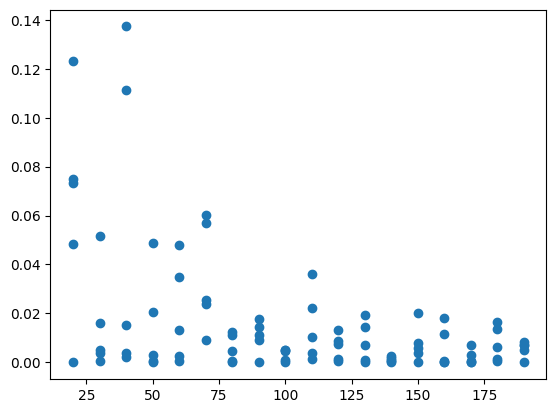

In [21]:
# simulations for various sample sizes
L = 1000
sample_sizes = []
Es = []
for sample_size in range(20, 200, 10):
    for _ in range(5):
        x = np.random.normal(0, 1, sample_size)
        eps = np.random.normal(0, var_, sample_size)
        y = x + eps
        a_hat = minimize(lambda a: empirical_risk(a, x, y), x0=0).x[0]
        Es.append(excess_risk(a_hat, 1))
        sample_sizes.append(sample_size)

plt.scatter(sample_sizes, Es)